In [1]:
import os
import sys

repo_root_path = os.path.abspath(os.path.join(os.path.pardir, 'hebbnets'))
if repo_root_path not in sys.path:
    sys.path.append(repo_root_path)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from hebbnets.hebbnets.hah_model import MultilayerDahEmbedding, MultilayerHahNetwork

%matplotlib nbagg

In [2]:
data_X, data_Y = load_iris(return_X_y=True)

# Scale X
data_X -= np.mean(data_X, axis=0, keepdims=True)
data_X /= np.std(data_X, axis=0, keepdims=True)

In [3]:
input_layer_size = data_X.shape[1]
nodes_per_layer = [2]

hah_network = MultilayerHahNetwork(
    input_layer_size,
    nodes_per_layer,
    has_bias=False,
    act_type='linear',
)

dah_network = MultilayerDahEmbedding(
    input_layer_size,
    nodes_per_layer,
    has_bias=False,
    act_type='linear',
)

In [4]:
hah_network.train(
    data_X,
    num_epochs=50
)

In [5]:
dah_network.train(
    list(zip(data_X, data_Y)),
    num_epochs=50
)

## Getting coordinates for each datapoint

In [6]:
coords_p = []
coords_e = []
for x in data_X:
    hah_network.propogate_input(x)
    coords_p.append(hah_network.layers[-1].activation)
    dah_network.propogate_input(x)
    coords_e.append(dah_network.layers[-1].activation)

coord_p_x, coord_p_y = list(zip(*coords_p))
coord_e_x, coord_e_y = list(zip(*coords_e))

color_dict = {0:'r', 1:'b', 2:'g'}
coord_colors = [color_dict[i] for i in data_Y]

## Plotting PCA vs Clustered scatter

<IPython.core.display.Javascript object>


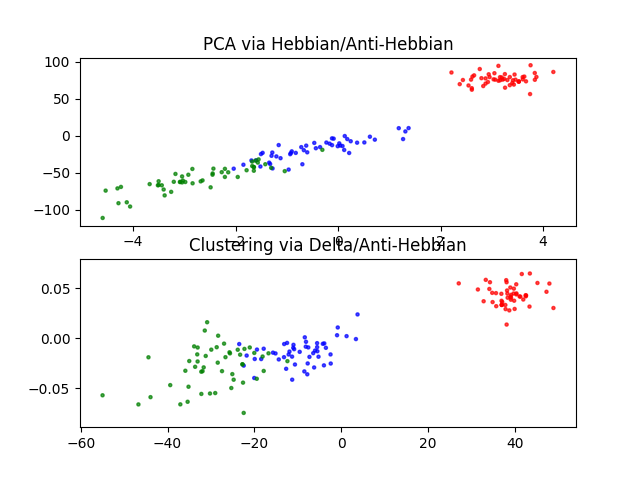

Text(0.5,1,'Clustering via Delta/Anti-Hebbian')

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].scatter(
    coord_p_x, coord_p_y,
    s=5, alpha=0.7,
    c=coord_colors
)
ax[0].set_title('PCA via Hebbian/Anti-Hebbian')

ax[1].scatter(
    coord_e_x, coord_e_y,
    s=5, alpha=0.7,
    c=coord_colors
)
ax[1].set_title('Clustering via Delta/Anti-Hebbian')